In [7]:
# get iris dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


# laod iris dataset
data = load_digits()

data.data = data.data + np.random.normal(0.0, 0.000001, size=data.data.shape)

# one hot encode the labels
data.target = keras.utils.to_categorical(data.target)

def get_model():
    
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(64,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    opt = tf.keras.optimizers.SGD(lr=0.01)

    model.compile(  optimizer="adam",
                    loss="categorical_crossentropy",
                    metrics=['accuracy']
                    )
    return model

# random weights of 1 to 100 centered around 0
weights = np.random.normal(0.0, 5, size=(64,))**2 # chi squared distribution
weights

epochs = 20

In [8]:
hist0_0 = []
for i in range(20):

    x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=i)

    model = get_model()
    hist0 = model.fit(x_train*weights, y_train,validation_data=(x_test*weights, y_test), epochs=epochs)

    hist0_0.append(hist0)

C:\Users\gbm96348\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
45/45 [==============================] - 1s 6ms/step - loss: 102.0037 - accuracy: 0.2651 - val_loss: 25.1713 - val_accuracy: 0.4694
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 17.5024 - accuracy: 0.5658 - val_loss: 11.4681 - val_accuracy: 0.6556
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 9.6219 - accuracy: 0.6715 - val_loss: 8.3639 - val_accuracy: 0.6806
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 6.5463 - accuracy: 0.7300 - val_loss: 6.8164 - val_accuracy: 0.7389
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 4.8430 - accuracy: 0.7724 - val_loss: 6.3106 - val_accuracy: 0.7056
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 3.8421 - accuracy: 0.7961 - val_loss: 4.5366 - val_accuracy: 0.7639
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 2.9600 - accuracy: 0.8239 - val_loss: 4.2964 - val_accuracy: 0.7556
Epoch 8/20
45/4

In [9]:
# normalise input data element wise

# add noise to input data
data_n = data.data

data_n = (data_n - data.data.mean(axis=0))/data_n.std(axis=0)




In [10]:
hist1_0 = []

for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(data_n, data.target, test_size=0.2, random_state=i)

    model_n = get_model()
    hist1 = model_n.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=epochs)

    hist1_0.append(hist1)

Epoch 1/20
45/45 [==============================] - 1s 4ms/step - loss: 2.2004 - accuracy: 0.2331 - val_loss: 1.9517 - val_accuracy: 0.4500
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 1.5479 - accuracy: 0.6214 - val_loss: 1.1853 - val_accuracy: 0.6972
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 0.7562 - accuracy: 0.8406 - val_loss: 0.5554 - val_accuracy: 0.8750
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.9068 - val_loss: 0.3669 - val_accuracy: 0.9056
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9297 - val_loss: 0.2891 - val_accuracy: 0.9278
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9527 - val_loss: 0.2550 - val_accuracy: 0.9306
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9596 - val_loss: 0.2256 - val_accuracy: 0.9306
Epoch 8/20
45/45 [==

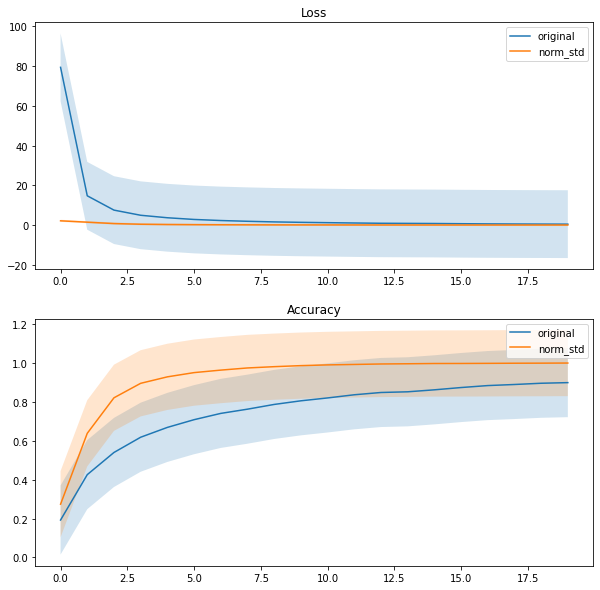

In [11]:
# compare the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

# mean loss curve from hist0

loss_0 = [hist0_0[i].history["loss"] for i in range(10)]

loss_0 = np.mean(np.array(loss_0), axis=0)

# compute std
loss_0_std = np.std(np.array(loss_0), axis=0)


loss_1 = [hist1_0[i].history["loss"] for i in range(10)]

loss_1 = np.mean(np.array(loss_1), axis=0)

# compute std
loss_1_std = np.std(np.array(loss_1), axis=0)


# same for accuracy

acc_0 = [hist0_0[i].history["accuracy"] for i in range(10)]

acc_0 = np.mean(np.array(acc_0), axis=0)

# compute std
acc_0_std = np.std(np.array(acc_0), axis=0)

acc_1 = [hist1_0[i].history["accuracy"] for i in range(10)]

acc_1 = np.mean(np.array(acc_1), axis=0)

# compute std
acc_1_std = np.std(np.array(acc_1), axis=0)


# plot

# plt.subplot(2,1,1)
# plt.plot(loss_0, label="original")
# plt.plot(loss_1, label="norm_std")
# plt.legend()
# plt.title("Loss")

# plt.subplot(2,1,2)
# plt.plot(acc_0, label="original")
# plt.plot(acc_1, label="norm_std")
# plt.legend()


plt.subplot(2,1,1)
# plot with shaded error curve
plt.plot(loss_0, label="original")
plt.fill_between(range(len(loss_0)), loss_0-loss_0_std, loss_0+loss_0_std, alpha=0.2)
plt.plot(loss_1, label="norm_std")
plt.fill_between(range(len(loss_1)), loss_1-loss_1_std, loss_1+loss_1_std, alpha=0.2)
plt.title("Loss")
plt.legend()

plt.subplot(2,1,2)
# plot with shaded error curve
plt.plot(acc_0, label="original")
plt.fill_between(range(len(acc_0)), acc_0-acc_0_std, acc_0+acc_0_std, alpha=0.2)
plt.plot(acc_1, label="norm_std")
plt.fill_between(range(len(acc_1)), acc_1-acc_1_std, acc_1+acc_1_std, alpha=0.2)
plt.title("Accuracy")
plt.legend()


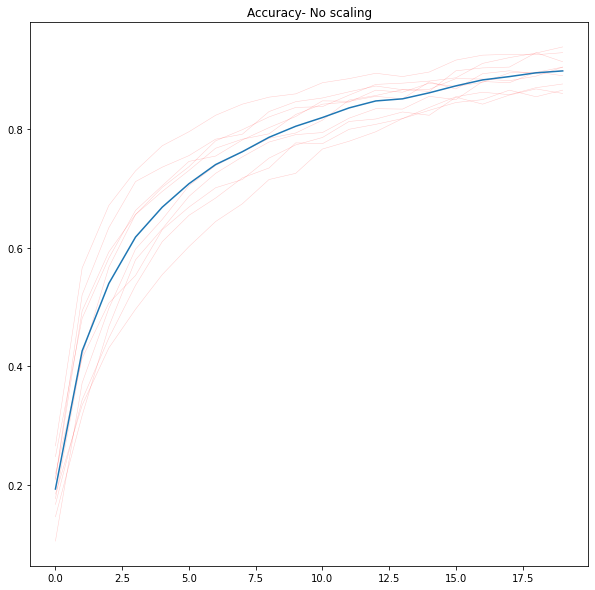

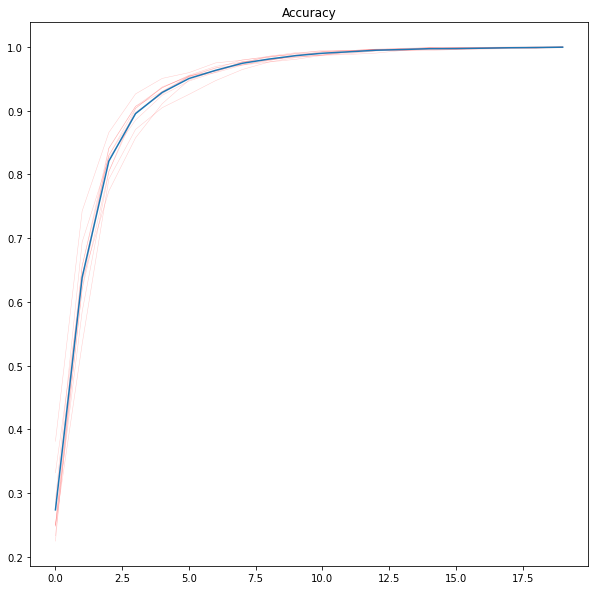

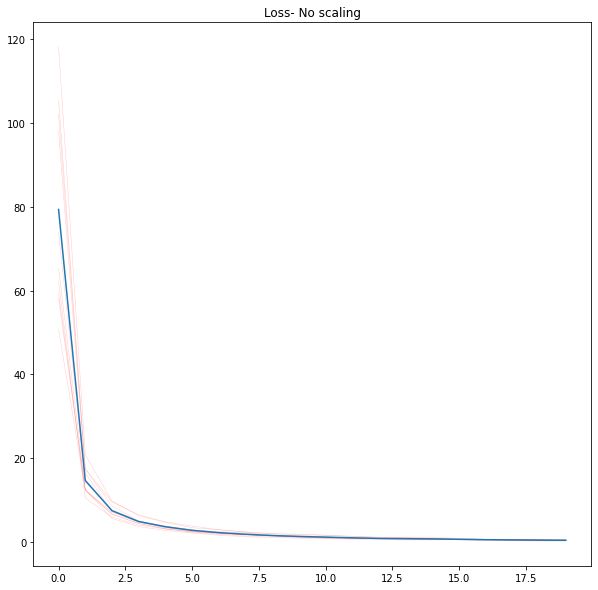

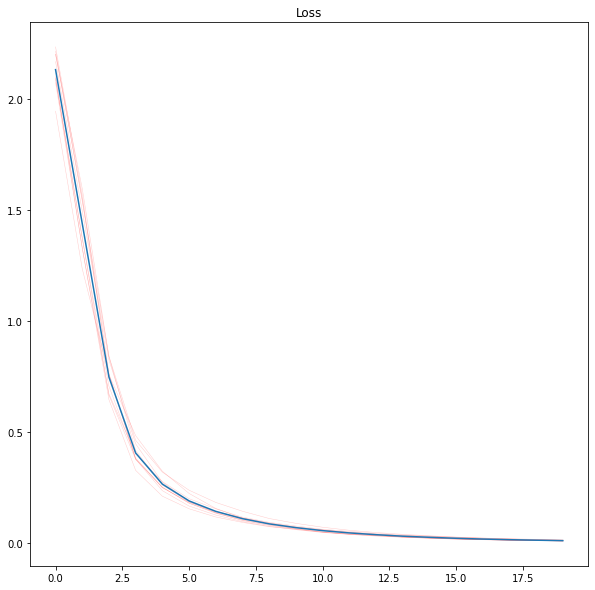

In [43]:
plt.figure(figsize=(10,10))
# plot the individual accuracy curves for hist0
for i in range(10):
    plt.plot(hist0_0[i].history["accuracy"], label="original", alpha=0.2,color="red",linewidth=0.5)
    plt.title("Accuracy- No scaling")
# add mean accuracy curve
plt.plot(np.mean(np.array([hist0_0[i].history["accuracy"] for i in range(10)]), axis=0), label="mean")

plt.figure(figsize=(10,10))
# repeat for hist1
for i in range(10):
    plt.plot(hist1_0[i].history["accuracy"], label="norm_std", alpha=0.2,color="red",linewidth=0.5)
    plt.title("Accuracy")
# add mean accuracy curve
plt.plot(np.mean(np.array([hist1_0[i].history["accuracy"] for i in range(10)]), axis=0), label="mean")

plt.figure(figsize=(10,10))
# plot the individual loss curves for hist0
for i in range(10):
    plt.plot(hist0_0[i].history["loss"], label="original", alpha=0.2,color="red",linewidth=0.5)
    plt.title("Loss- No scaling")
# add mean loss curve
plt.plot(np.mean(np.array([hist0_0[i].history["loss"] for i in range(10)]), axis=0), label="mean")

plt.figure(figsize=(10,10))
# repeat for hist1
for i in range(10):
    plt.plot(hist1_0[i].history["loss"], label="norm_std", alpha=0.2,color="red",linewidth=0.5)
    plt.title("Loss")
# add mean loss curve
plt.plot(np.mean(np.array([hist1_0[i].history["loss"] for i in range(10)]), axis=0), label="mean")


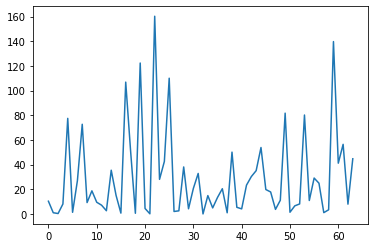

In [12]:
plt.plot(weights)

## Conclusion

Normalised data appears to implicity assigns equal weights to all the imput features.